In [3]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb


In [2]:
! pip install matplotlib pandas scikit-learn xgboost


  Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached scikit_learn-1.7.1-cp310-cp310-win_amd64.whl (8.9 MB)
  Using cached xgboost-3.0.4-py3-none-win_amd64.whl (56.8 MB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached fonttools-4.59.2-cp310-cp310-win_amd64.whl (2.3 MB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.5.2-py3-none-any.whl (308 kB)


You should consider upgrading via the 'E:\crowd\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
# Step 2: Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Check first 5 rows
pd.DataFrame(X, columns=feature_names).head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 105
Testing samples: 45


=== Decision Tree ===
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



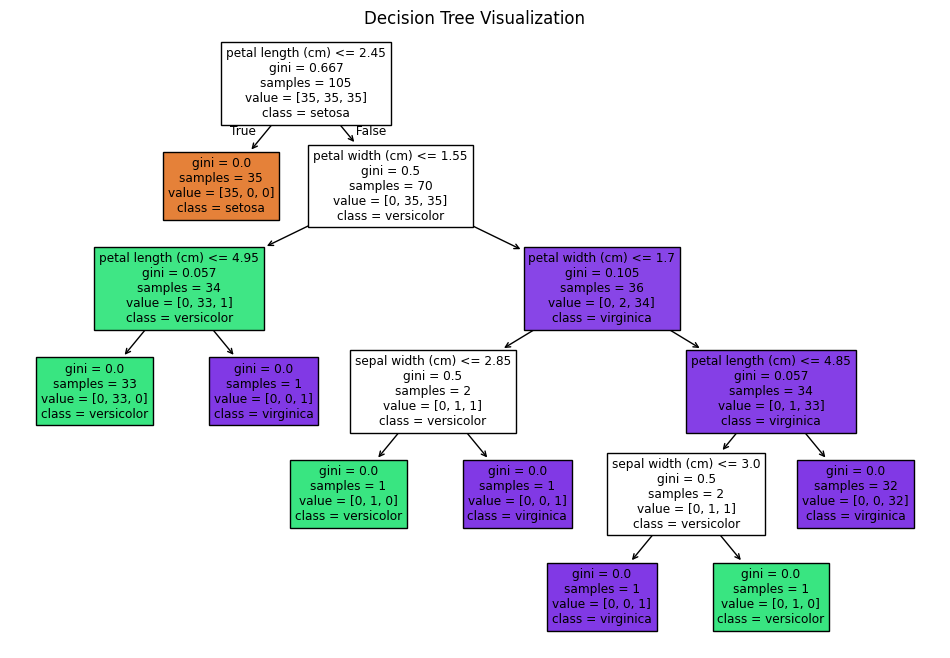

In [6]:
# Step 4: Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Accuracy and classification report
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds, target_names=class_names))

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()



=== Random Forest ===
Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



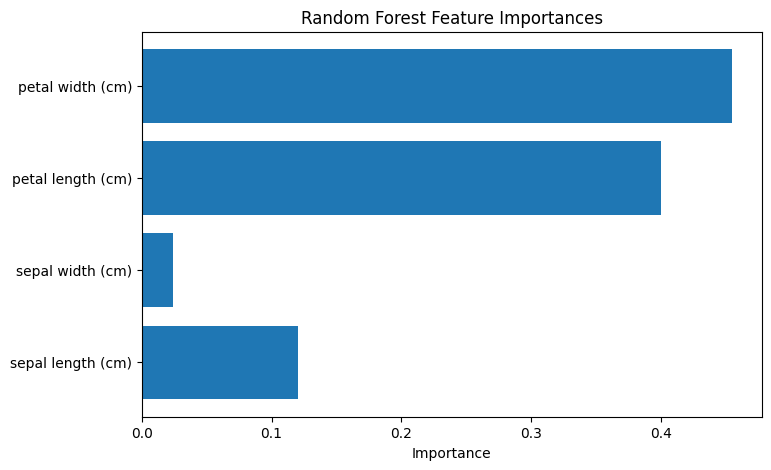

In [7]:
# Step 5: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds, target_names=class_names))

# Plot Random Forest Feature Importance
rf_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(feature_names, rf_importances)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()



=== XGBoost ===
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



e:\crowd\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [17:34:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


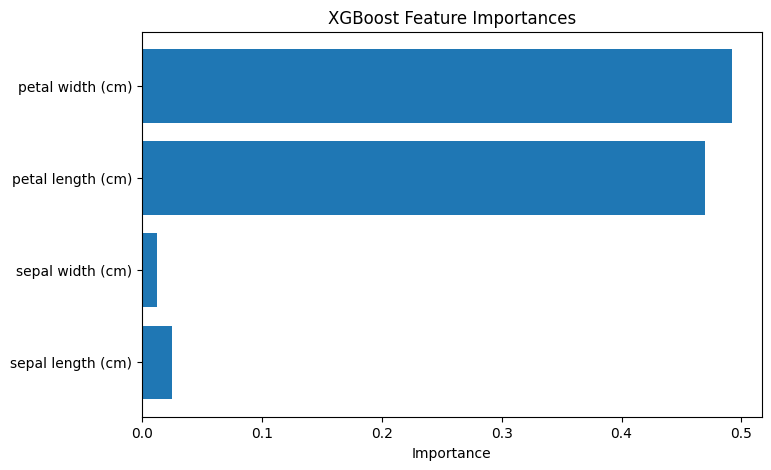

In [8]:
# Step 6: Train XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("\n=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds, target_names=class_names))

# Plot XGBoost Feature Importance
xgb_importances = xgb_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(feature_names, xgb_importances)
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.show()


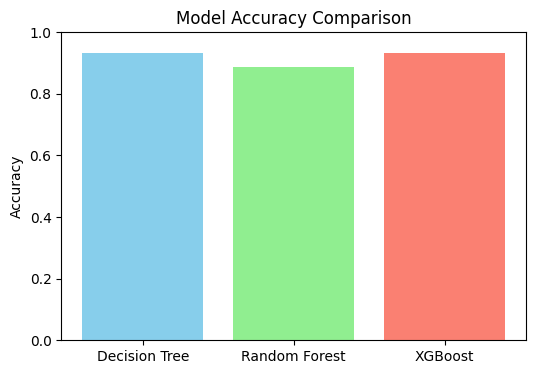

In [9]:
# Step 7: Compare accuracies
accuracies = {
    "Decision Tree": accuracy_score(y_test, dt_preds),
    "Random Forest": accuracy_score(y_test, rf_preds),
    "XGBoost": accuracy_score(y_test, xgb_preds)
}

plt.figure(figsize=(6,4))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue','lightgreen','salmon'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


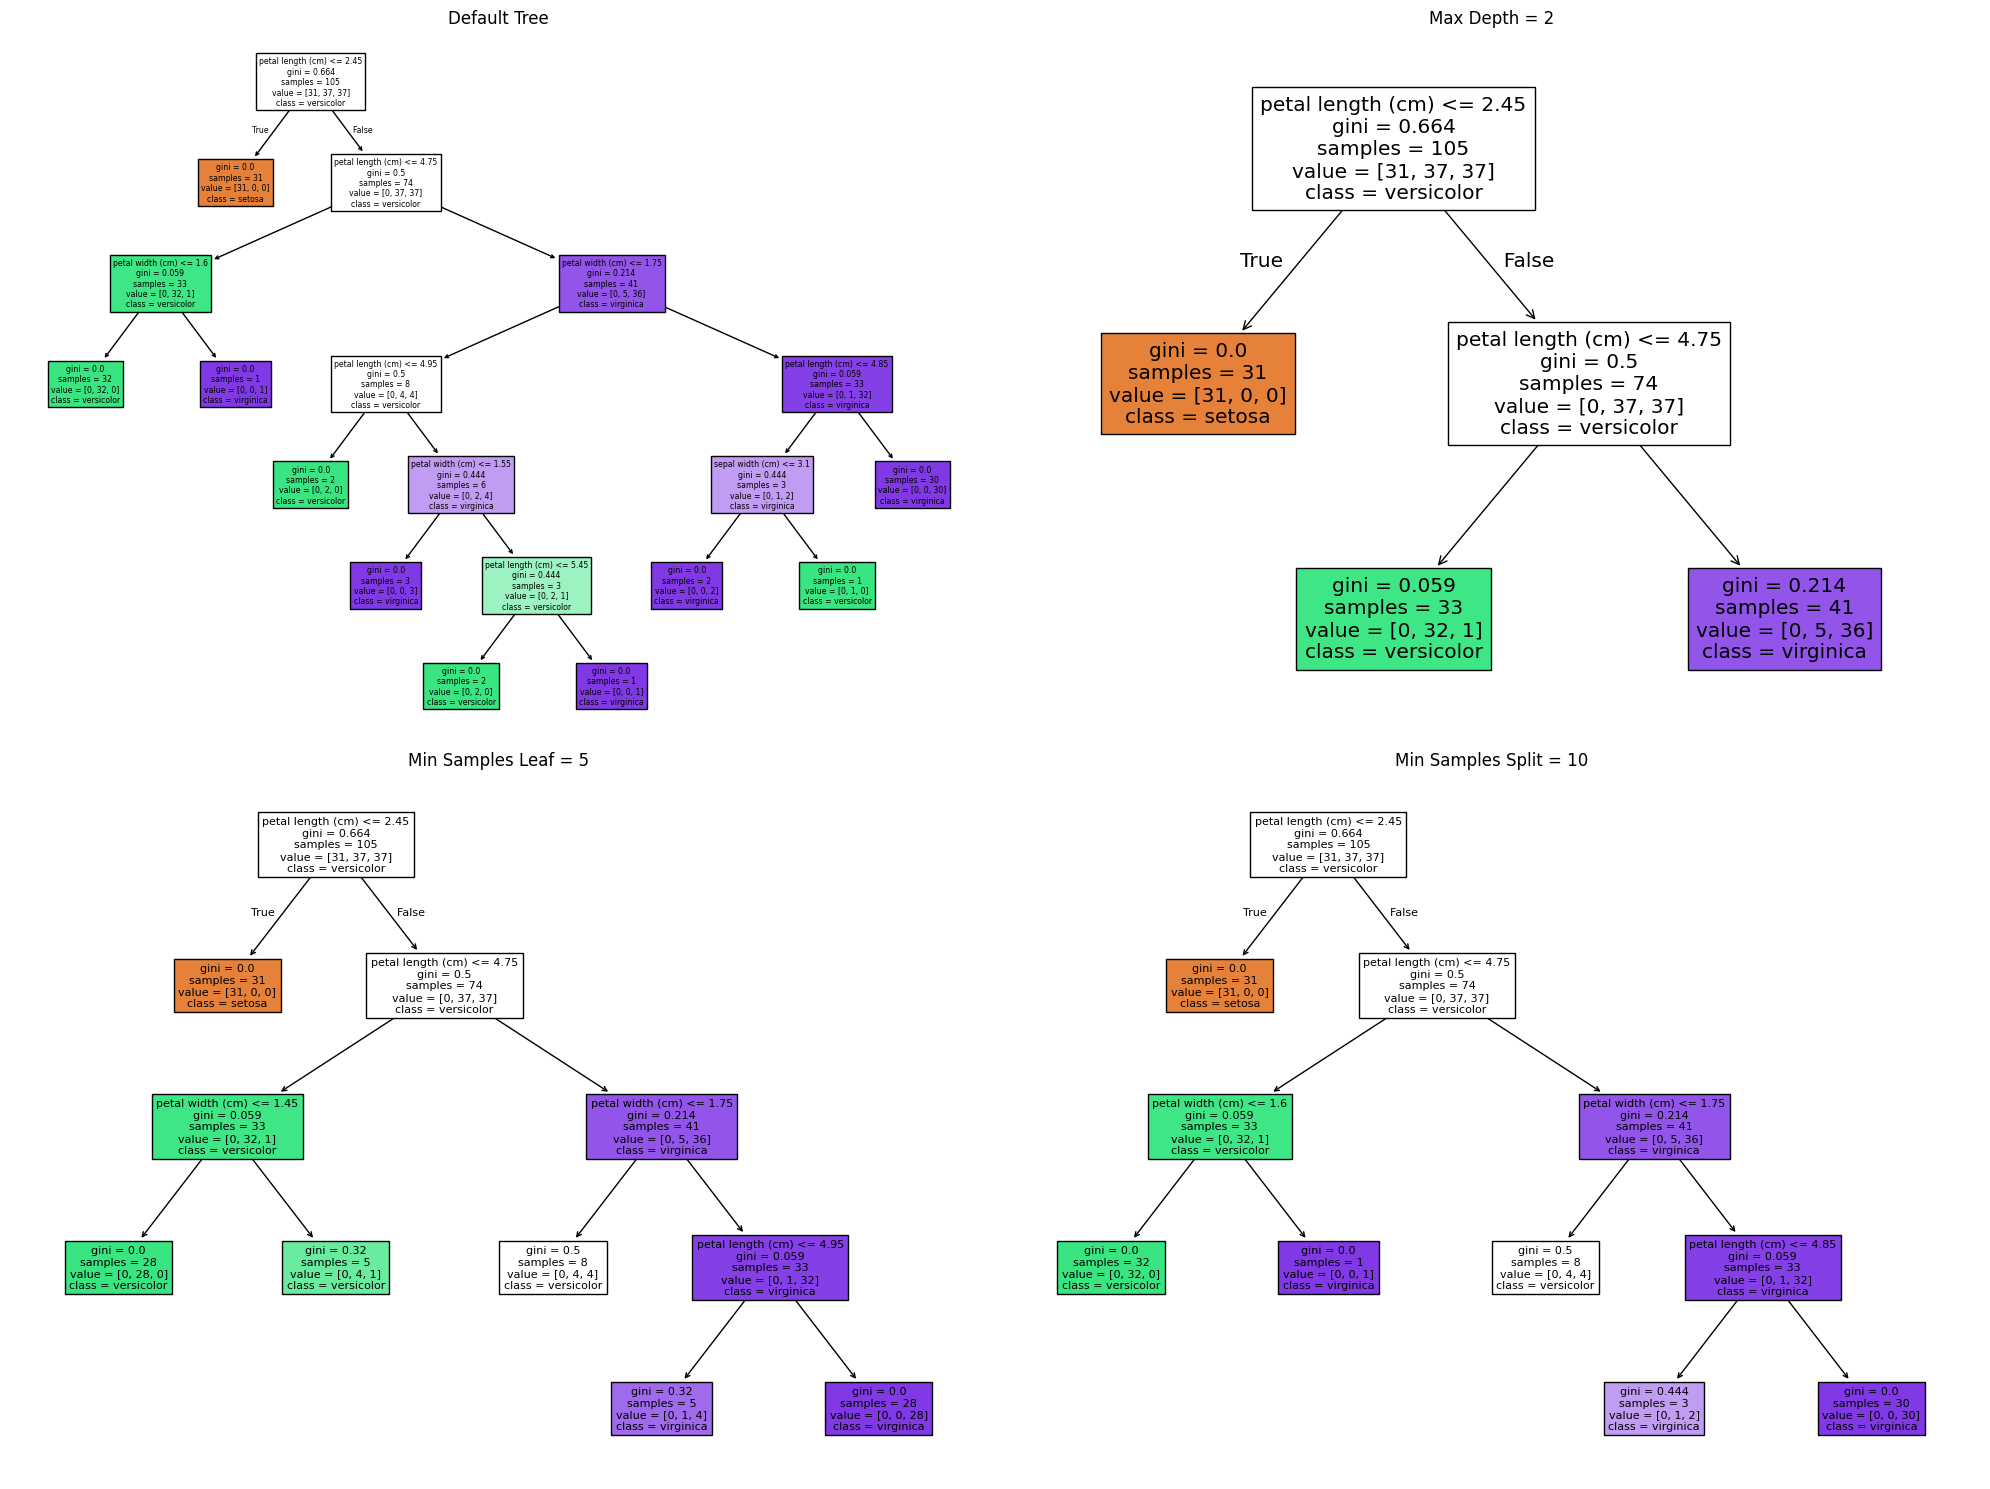

In [12]:
# Visualization of Decision Tree Parameters Effect
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create trees with different parameters
trees = {
    "Default Tree": DecisionTreeClassifier(random_state=42),
    "Max Depth = 2": DecisionTreeClassifier(max_depth=2, random_state=42),
    "Min Samples Leaf = 5": DecisionTreeClassifier(min_samples_leaf=5, random_state=42),
    "Min Samples Split = 10": DecisionTreeClassifier(min_samples_split=10, random_state=42)
}

# Plot all trees
plt.figure(figsize=(20, 15))
for i, (title, model) in enumerate(trees.items(), 1):
    model.fit(X_train, y_train)
    plt.subplot(2, 2, i)
    plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.title(title)

plt.tight_layout()
plt.show()


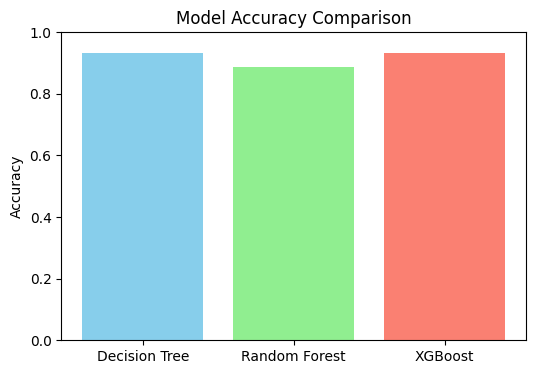